# Steel Plate Defect Prediction

This is a KAGGLE Competition on predicting Seel Plate Defects

There are 7 binary targets: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults. The objective is to predict the probability of each of the 7 binary targets of the test set. 

The data is already split in Train and Test sets.

The competition URL: https://www.kaggle.com/competitions/playground-series-s4e3/overview

https://www.kaggle.com/code/kidkoala/super-simple-defect-prediction-with-3-models

## Importing Libraries

In [19]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Reading the data

In [20]:
# Setting the pandas condition to display all columns
pd.set_option('display.max_columns', None)

In [21]:
# Locating the zip file
file = zipfile.ZipFile('..\Data\playground-series-s4e3.zip')

# Printing the filelist
for i in file.filelist:
    print(i.filename)

sample_submission.csv
test.csv
train.csv


In [41]:
# Openning the zip file and reading the provided csv file from KAGGLE

with file.open('train.csv') as t:
    df_train = pd.read_csv(t)
    
    
with file.open('test.csv') as te:
    df_test = pd.read_csv(te)

## Exploring the df

In [42]:
print('The train df contains {} rows and {} columns'.format(df_train.shape[0], df_train.shape[1]))

print('The test df contains {} rows and {} columns'.format(df_test.shape[0], df_test.shape[1]))

The train df contains 19219 rows and 35 columns
The test df contains 12814 rows and 28 columns


In [43]:
# Showing some columns of the df
df_train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [46]:
# Concatening train df and the test df in one

total_df = pd.concat([df_train, df_test])

In [47]:
# Checking the null values of the df

total_df.isnull().sum()

id                           0
X_Minimum                    0
X_Maximum                    0
Y_Minimum                    0
Y_Maximum                    0
Pixels_Areas                 0
X_Perimeter                  0
Y_Perimeter                  0
Sum_of_Luminosity            0
Minimum_of_Luminosity        0
Maximum_of_Luminosity        0
Length_of_Conveyer           0
TypeOfSteel_A300             0
TypeOfSteel_A400             0
Steel_Plate_Thickness        0
Edges_Index                  0
Empty_Index                  0
Square_Index                 0
Outside_X_Index              0
Edges_X_Index                0
Edges_Y_Index                0
Outside_Global_Index         0
LogOfAreas                   0
Log_X_Index                  0
Log_Y_Index                  0
Orientation_Index            0
Luminosity_Index             0
SigmoidOfAreas               0
Pastry                   12814
Z_Scratch                12814
K_Scatch                 12814
Stains                   12814
Dirtines

We do not have null values in this df. We have null values only on the targeted labeles, with the exact number as the test df length (Soo, in test df these labeles are not present).

There are no null values in the train and the test df

In [48]:
# Descriptive Analysis of the train df

total_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,32033.000000,32033.000000,32033.000000,3.203300e+04,3.203300e+04,32033.000000,32033.000000,32033.000000,3.203300e+04,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,16016.000000,709.645334,753.624543,1.848467e+06,1.844775e+06,1679.555583,95.976618,64.366716,1.921837e+05,84.704274,128.663972,1459.664721,0.403677,0.595355,76.075329,0.353367,0.408989,0.574153,0.030644,0.616310,0.832521,0.589133,2.473182,1.312276,1.389089,0.102111,-0.138835,0.572102,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,9247.274923,531.669711,500.191878,1.908685e+06,1.902334e+06,3728.345922,195.752307,142.621733,4.581274e+05,28.764701,14.230437,145.784045,0.490642,0.490831,53.753964,0.318964,0.124288,0.258963,0.047850,0.221586,0.220701,0.482558,0.760776,0.467750,0.404018,0.487852,0.119363,0.332116,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.066700,0.000000,0.778200,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8008.000000,49.000000,214.000000,6.459330e+05,6.459920e+05,89.000000,15.000000,14.000000,9.948000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317300,0.375000,0.006600,0.454500,0.662700,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192600,0.257000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16016.000000,777.000000,796.000000,1.388373e+06,1.388398e+06,169.000000,25.000000,24.000000,1.836100e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.240800,0.413000,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143300,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24024.000000,1152.000000,1166.000000,2.368032e+06,2.357532e+06,652.000000,64.000000,60.000000,6.790100e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.655200,0.494500,0.818200,0.019100,0.785700,1.000000,1.000000,2.814200,1.431400,1.707600,0.529400,-0.084200,0.999300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,32032.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.747200,1.000000,1.000000,1.000000,4.680200,2.997300,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Checking if we have duplicated values

total_df.duplicated().sum()

0

There are no duplicate values on the df

# EDA (Exploratory Data Analysis)

In [50]:
sns.set_style('darkgrid')

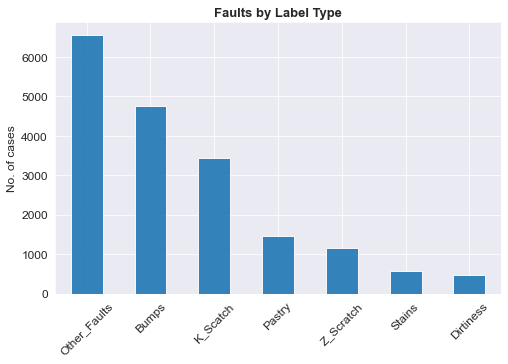

In [51]:
# Plotting Faults by the label type

faults_by_type = df_train[targets].sum().sort_values(ascending = False)

faults_by_type.plot(kind='bar', alpha = 0.9, figsize=(8,5))
plt.title('Faults by Label Type', fontsize = 13, fontweight = 'bold')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel('No. of cases', fontsize=12)

plt.show()

From the above chart we can observe that the majority of the cases are "Other_Faults", followed by "Bumps" and "K_Scatch"

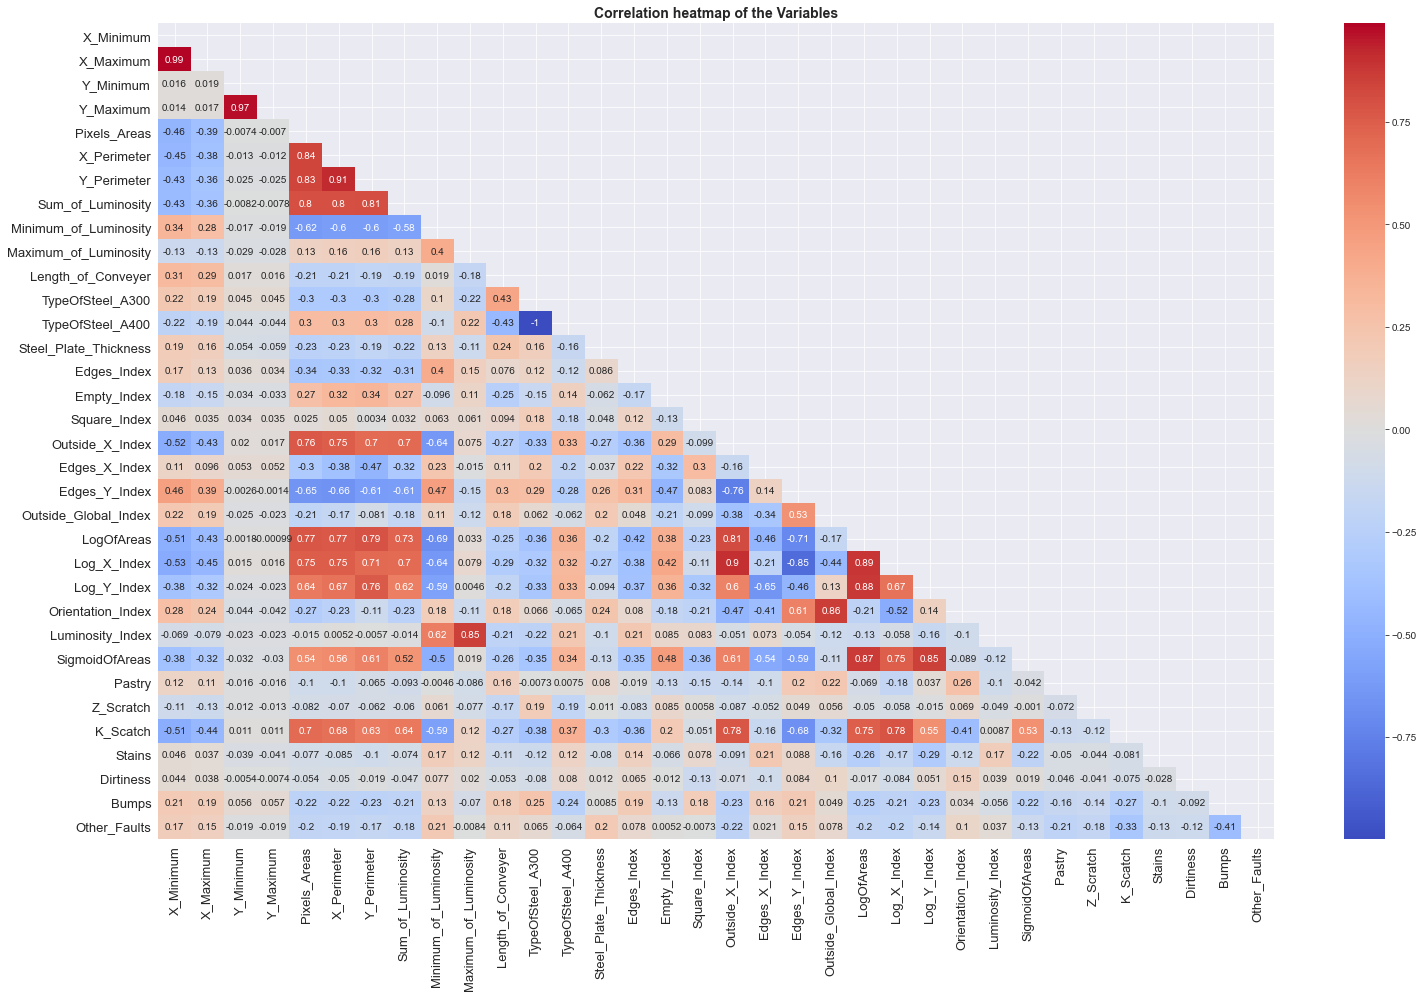

In [52]:
# Plotting the heatmap of correlations between features

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data=df_train.drop('id',axis=1).corr(), 
        annot=True, 
        mask = np.triu(np.ones_like(df_train.drop('id',axis=1).corr(), dtype=bool)),
           cmap='coolwarm')

plt.title('Correlation heatmap of the Variables', fontsize=14, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

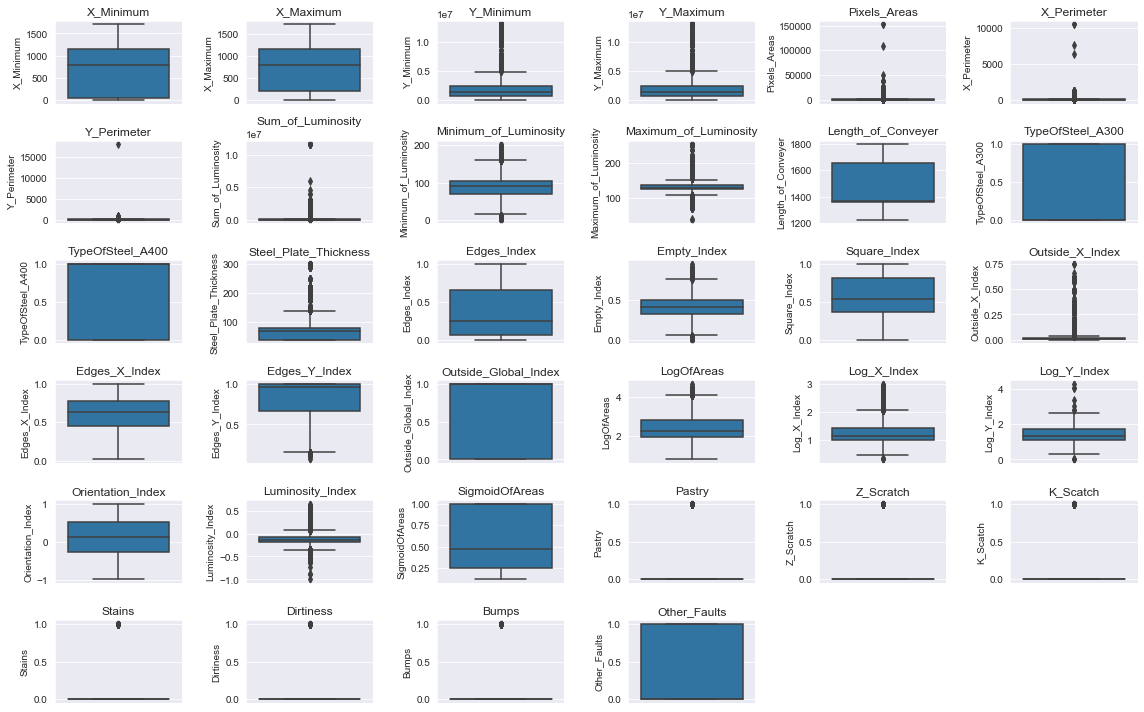

In [53]:
# Plotting the distribution of the columns

plt.figure(figsize=(16, 10))

for i, column in enumerate(total_df.drop('id',axis=1), start=1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=total_df[column])
    plt.title(column)

plt.tight_layout()
plt.show();

There are a lot of features that are spread in a wide range. These points may be criticall in creating the model

## Feature Engineering

In [54]:
total_df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [57]:
def feature_engineering(df):
    """
    This function is created to make the feature engineering process of this dataset
    """
    
    df['X_distance'] = df['X_Maximum'] - df['X_Minimum']
    df['Y_distance'] = df['Y_Maximum'] - df['Y_Minimum']
    
    df['Color_contrast'] = df['Maximum_of_Luminosity'] - df['Minimum_of_Luminosity']
    
    # Density Feature
    df['Density'] = df['Pixels_Areas'] / (df['X_Perimeter'] + df['Y_Perimeter'])
    
    return df

In [58]:
total_df = feature_engineering(total_df)

In [59]:
total_df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_distance,Y_distance,Color_contrast,Density
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,5,27,1.230769
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,22,41,5.851351
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,153,68,112,10.122667
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,27,20,4.666667
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,45,29,3.748201


In [60]:
total_df.skew()

id                        0.000000
X_Minimum                 0.012553
X_Maximum                 0.066269
Y_Minimum                 2.570073
Y_Maximum                 2.565807
Pixels_Areas              7.228001
X_Perimeter              13.859640
Y_Perimeter              64.730920
Sum_of_Luminosity         7.807619
Minimum_of_Luminosity    -0.331854
Maximum_of_Luminosity     1.249437
Length_of_Conveyer        0.851547
TypeOfSteel_A300          0.392663
TypeOfSteel_A400         -0.388569
Steel_Plate_Thickness     2.372863
Edges_Index               0.538535
Empty_Index               0.209892
Square_Index              0.018202
Outside_X_Index           3.333037
Edges_X_Index            -0.253250
Edges_Y_Index            -0.991248
Outside_Global_Index     -0.362155
LogOfAreas                0.855029
Log_X_Index               1.103902
Log_Y_Index               0.401086
Orientation_Index        -0.185223
Luminosity_Index          0.719731
SigmoidOfAreas            0.220912
Pastry              

## Training the models

In [125]:
# defineing the targeted columns:

targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [126]:
# Spliting train and test df after processing

train_df = total_df[:train_df.shape[0]]
test_df = total_df[train_df.shape[0]:].dropna(axis=1)

In [127]:
# Df that will be used for train 
train_df.drop('id', axis=1,inplace=True)

train_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_distance,Y_distance,Color_contrast,Density
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,5,27,1.230769
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,22,41,5.851351
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,153,68,112,10.122667
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,27,20,4.666667
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,45,29,3.748201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,9,18,2.125000
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,12,29,5.372093
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,74,53,3.679245
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9,12,44,3.230769


In [128]:
# Train/Test splitting
from sklearn.model_selection import train_test_split

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
X = train_df.drop(targets, axis = 1)

y = train_df[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [131]:
xgb = {'num_leaves': 68, 
             'learning_rate': 0.01,
             'subsample_for_bin': 140000, 
             'min_child_samples': 175, 
             'reg_alpha': 0.16, 
             'reg_lambda': 0.8, 
             'colsample_bytree': 0.6, 
             'subsample': 0.8, 
             'max_depth': 4, 
             'n_estimators': 900, 
             'boosting_type': 'dart'}

In [132]:
from xgboost import XGBClassifier

In [133]:
xgb1 = XGBClassifier(**xgb)

In [134]:
xgb1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [16:00:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "boosting_type", "min_child_samples", "num_leaves", "subsample_for_bin" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, boosting_type='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_samples=175, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=900,
              n_jobs=None, ...)

In [135]:
from sklearn.metrics import roc_auc_score

In [136]:
# Get the predicted probabilities for the positive class
y_prob = xgb1.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8900604138047427


In [137]:
test_df = test_df.drop('id', axis=1)

In [138]:
test_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_distance,Y_distance,Color_contrast,Density
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172,18,24,60,9.550725
1,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104,14,13,40,6.851852
2,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514,14,9,33,4.250000
3,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051,10,25,33,3.809524
4,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170,33,14,31,4.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,1101,1116,447943,447992,313,32,37,21603,79,103,1353,0,1,70,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894,15,49,24,4.536232
12810,1289,1306,3149494,3149542,59,9,18,5249,113,141,1362,0,1,40,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954,17,48,28,2.185185
12811,41,210,1587535,1587191,16584,796,522,1858162,24,143,1400,0,1,40,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000,169,-344,119,12.582701
12812,1329,1340,702237,702267,386,43,34,36875,66,124,1364,0,1,40,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844,11,30,58,5.012987


In [140]:
test_ids = df_test['id']

In [141]:
test_prediction = xgb1.predict_proba(test_df)
X_test_prediction = pd.DataFrame(test_prediction, columns = y.keys())
submission = pd.concat([test_ids, X_test_prediction],axis = 1)
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.507527,0.000962,0.003885,0.000126,0.019000,0.166261,0.395492
1,19220,0.236101,0.017596,0.010999,0.000268,0.183485,0.170589,0.359142
2,19221,0.002087,0.048410,0.040962,0.000546,0.007549,0.275088,0.472258
3,19222,0.159045,0.001186,0.000462,0.002119,0.013291,0.378417,0.441188
4,19223,0.002019,0.001595,0.000668,0.002536,0.005564,0.636642,0.354990
...,...,...,...,...,...,...,...,...
12809,32028,0.077976,0.110482,0.003555,0.000180,0.021490,0.230198,0.312113
12810,32029,0.202340,0.004162,0.019173,0.007027,0.116884,0.169761,0.435485
12811,32030,0.000622,0.000709,0.909595,0.000225,0.000737,0.001678,0.069899
12812,32031,0.346952,0.009067,0.025658,0.000183,0.050101,0.169886,0.344926


In [124]:
submission.to_csv('submission.csv', index=False)